### Limits of Diversification
Why does not diversification help you in market crashes?

One reason is that correlations across assets increasses as the market drops. Let's see if we can this in the data.

Let's load up the industry data that we've used in the past.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import portfolio_management_lib as port
ind_return = port.get_ind_returns()

ind_return.head()

/home/joe/Study/portfolio_management_prac/lib/portfolio_management_lib.py:237: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


##### Implmenting a Cap-Weighted Portfolio
Most market indices are constructed by taking a set of assets and weighting them by their market equity aka market capitalization.

Let's construct a market cap weighted index from our 30 industry portfolios.

For each of these industries, we also have data on the number of stocks in each industry as well as the average market cap in each industry. Thus, we can multiply the average market cap by the number of companies to get the toal market capitalization of each industry. We can then weight each industry portfolio proportional to the market capitalization of that industry.

Let's load the industry size and average number of firm.

In [3]:
ind_nfirms = port.get_ind_nfirms()
ind_size = port.get_ind_size()

In [4]:
(ind_nfirms.iloc[-1] - ind_nfirms.iloc[0])[28]

ind_nfirms.columns[28]

/tmp/ipykernel_81629/1234558337.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (ind_nfirms.iloc[-1] - ind_nfirms.iloc[0])[28]


'Fin'

In [5]:
ind_size.shape, ind_size.head()

((1110, 30),
           Food  Beer  Smoke  Games  Books  Hshld  Clths   Hlth  Chems  Txtls  \
 1926-07  35.98  7.12  59.72  26.41  12.02  22.27  18.36  25.52  57.59   6.18   
 1926-08  36.10  6.75  60.47  27.17  13.33  22.13  19.83  25.80  62.13   6.20   
 1926-09  37.00  8.58  64.03  27.30  14.67  21.18  19.29  26.73  65.53   6.71   
 1926-10  37.14  8.92  64.42  28.76  14.42  21.23  19.03  26.87  68.47   6.82   
 1926-11  35.88  8.62  65.08  27.38  15.79  20.14  19.03  26.54  65.06   6.84   
 
          ...   Telcm  Servs  BusEq  Paper  Trans  Whlsl  Rtail  Meals    Fin  \
 1926-07  ...  350.36  13.60  56.70  35.35  66.91   1.19  46.65  10.82  18.83   
 1926-08  ...  353.27  14.75  57.74  37.86  67.99   0.90  46.57  11.00  18.88   
 1926-09  ...  360.96  15.05  59.61  36.82  71.02   0.95  46.11  10.94  19.67   
 1926-10  ...  364.16  15.30  59.52  34.77  70.83   0.88  46.15  10.80  19.36   
 1926-11  ...  363.74  14.89  58.74  32.80  68.75   0.74  45.03  10.33  18.35   
 
          O

Now we have the market capitalizations for each month, we can compute the total market capitalization over time by summing over all industries:

In [6]:
ind_mktcap = ind_nfirms * ind_size # returns the total market value of each industry
ind_mktcap.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,...,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,...,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04
1926-09,1591.00,25.74,1024.48,191.10,29.34,169.44,231.48,187.11,1114.01,87.23,...,1804.80,45.15,417.27,220.92,5255.48,1.90,1521.63,65.64,236.04,108.84
1926-10,1597.02,26.76,1030.72,201.32,28.84,169.84,228.36,188.09,1163.99,88.66,...,1820.80,45.90,416.64,208.62,5241.42,1.76,1522.95,64.80,232.32,104.64
1926-11,1542.84,25.86,1041.28,191.66,31.58,161.12,228.36,185.78,1106.02,88.92,...,1818.70,44.67,411.18,196.80,5087.50,1.48,1485.99,61.98,220.20,95.76


In [7]:
total_mktcap = ind_mktcap.sum(axis = 1)
total_mktcap.head()

1926-07    26657.94
1926-08    27436.34
1926-09    28060.41
1926-10    28057.23
1926-11    27198.40
Freq: M, dtype: float64

We can see clearly that the market has grown over time.

<Axes: >

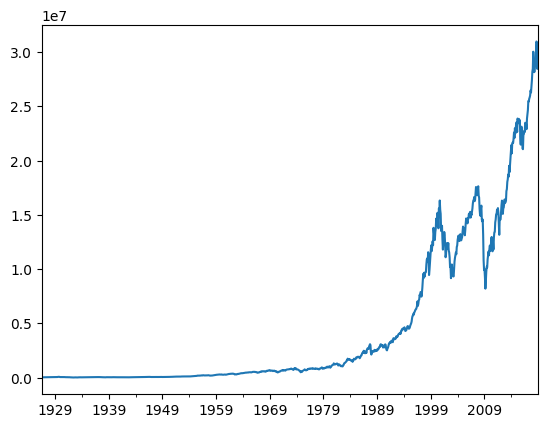

In [8]:
total_mktcap.plot()

We can now compute the capweight of each industry as follows:

In [27]:
ind_capweight = ind_mktcap.divide(total_mktcap, axis = 0)
ind_capweight.sum(axis = 1 )


1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
          ... 
2018-08    1.0
2018-09    1.0
2018-10    1.0
2018-11    1.0
2018-12    1.0
Freq: M, Length: 1110, dtype: float64

Let's verify that the sum of the cap weights of all the columns should always sum to 1.

Because there are floating point numbers, it is not a good idea to test if they sum to 1 by using `== 1.0`. Instead, we make sure that they are very close to 1 as follows:

In [10]:
all(abs(ind_capweight.sum(axis = 1) - 1) < 1E-10)

sample_sum = ind_capweight.sum(axis = 1) - 1
print(sample_sum)
print("\n")
abs_sample_sum = abs(sample_sum) < 1E-10
print(abs_sample_sum)
print("\n")
all_check = all(abs_sample_sum)
print(all_check)

1926-07   -1.0
1926-08   -1.0
1926-09   -1.0
1926-10   -1.0
1926-11   -1.0
          ... 
2018-08   -1.0
2018-09   -1.0
2018-10   -1.0
2018-11   -1.0
2018-12   -1.0
Freq: M, Length: 1110, dtype: float64


1926-07    False
1926-08    False
1926-09    False
1926-10    False
1926-11    False
           ...  
2018-08    False
2018-09    False
2018-10    False
2018-11    False
2018-12    False
Freq: M, Length: 1110, dtype: bool


False


<Axes: >

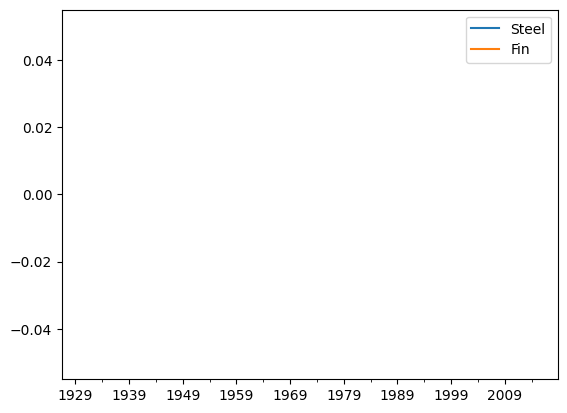

In [11]:
l = ["Steel", "Fin"]
ind_capweight[l].plot.line()

##### Constructing a Cap Weighted Market Index
One way to construct a market index is to build a portfolio whose wegihts are rebalanced back to the target weights every period. In reality, the weights may drift over time but this simplication is close enough.

<Axes: >

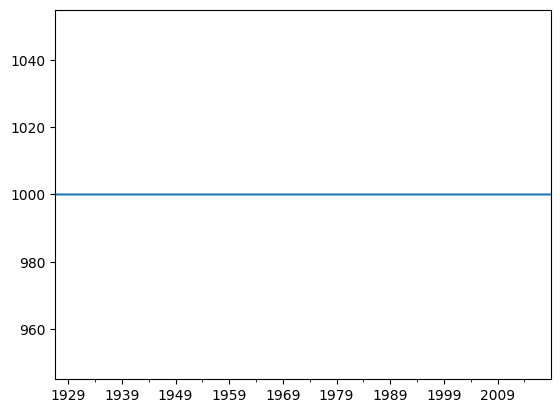

In [12]:
# Entire Market Size comprehensively including all the sectors.
total_market_return = (ind_capweight * ind_return).sum(axis = 1)
# get the wealth grwoth rate.
total_market_index = port.drawdown(total_market_return)["Wealth"]
total_market_index.plot()

/home/joe/Study/portfolio_management_prac/lib/portfolio_management_lib.py:237: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100


<Axes: >

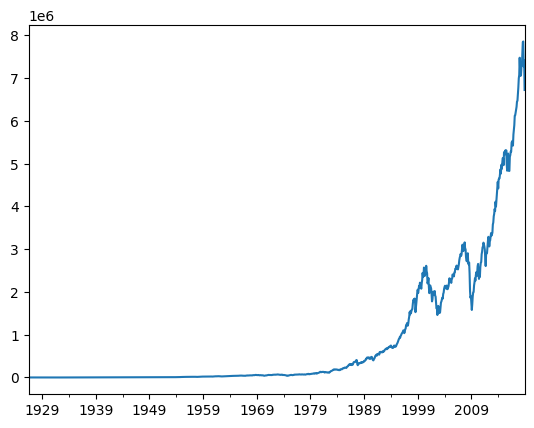

In [13]:
total_market_return = port.get_total_market_index_returns()
total_market_indx = port.drawdown(total_market_return).Wealth
total_market_indx.plot()

##### Rolling Windows
Let's construct a rolling window of returns over a trailing 36 months period. Pandas contains direct support for rolling windows, and allows us to aggregate the returns over a window. In our case, let's compute the average return over a trailing 36 months window.

<Axes: >

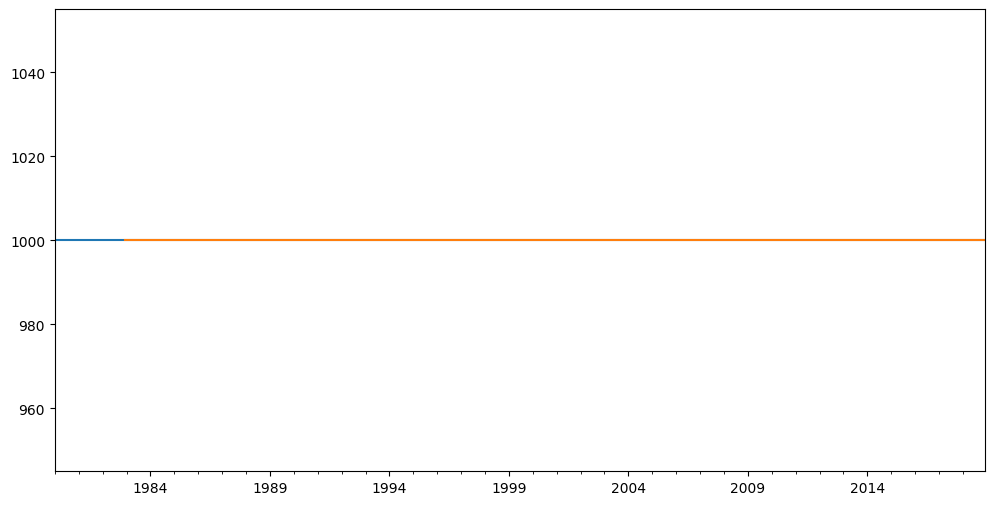

In [14]:
total_market_index["1980":].plot(figsize=(12, 6))
# it is moving average as well!
total_market_index["1980":].rolling(window=36).mean().plot()

We do not really want the man return, we want to look at the trailing 3 year compunded return. We need to apply our function, instead of mean().

Each time the window is advanced, a new DataFrame (with just the slice of the DataFrame in the window) is used to generate a new value. You can either use one of the Built-in DataFrame methods like `.mean` or we can use the `.aggregate` method to apply our own function to each column for all the rows that fall in that window.

Let's create a time series of the annualized returns over the trailing 36 motnhs and the average correlation across stocks over that same 36 months.

<Axes: >

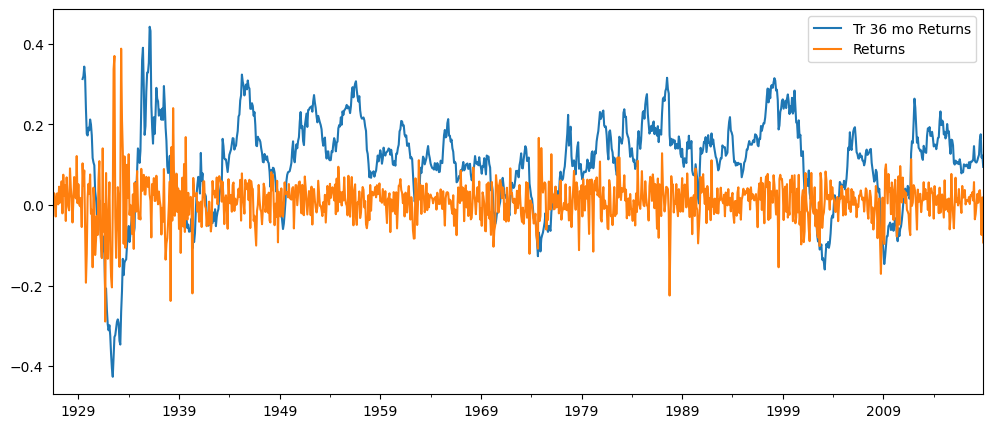

In [15]:
tmi_tr36rets = total_market_return.rolling(window = 36).aggregate(port.annualize_rets, freq = "Monthly")
tmi_tr36rets.plot(figsize=(12, 5), legend = True, label = "Tr 36 mo Returns")
total_market_return.plot(label="Returns", legend = True)

##### Rolling Correlations: Multi-indexes and `.groupby`
Next, we would like to look at average correlations between all the industries over that same trailing 3 years window.

Let's start by constructiong the time series of correlations over time over a 36 month window

In [16]:
ts_corr = ind_return.rolling(window = 36).corr()
ts_corr

Food      Beer     Smoke     Games     Books     Hshld  \
1926-07 Food        NaN       NaN       NaN       NaN       NaN       NaN   
        Beer        NaN       NaN       NaN       NaN       NaN       NaN   
        Smoke       NaN       NaN       NaN       NaN       NaN       NaN   
        Games       NaN       NaN       NaN       NaN       NaN       NaN   
        Books       NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
1926-07 Food        NaN       NaN       NaN       NaN  ...       NaN   
        Beer        NaN       NaN       NaN       NaN  ...       NaN   
        Smoke       NaN       NaN       NaN       NaN  ...       NaN   
        Games       NaN       NaN       NaN       NaN  ...       NaN   
        Books       NaN       NaN       NaN       NaN  ...       NaN   
...                 ...       ...       ...       ...  ...       ...   
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
1926-07 Food        NaN       NaN       NaN       NaN       NaN       NaN   
        Beer        NaN       NaN       NaN       NaN       NaN       NaN   
        Smoke       NaN       NaN       NaN       NaN       NaN       NaN   
        Games       NaN       NaN       NaN       NaN       NaN       NaN   
        Books       NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
1926-07 Food        NaN       NaN       NaN  
        Beer        NaN       NaN       NaN  
        Smoke       NaN       NaN       NaN  
        Games       NaN       NaN       NaN  
        Books       NaN       NaN       NaN  
...                 ...       ...       ...  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[33300 rows x 30 columns]

What is created is a DataFrame with a MultiLevel index. The first level is the date and the second level is industry name. We can make this easier to see if we igve names to the levels of index:

In [17]:
ts_corr.index.names = ['date','ind']
ts_corr.columns.names = ["ind"]
ts_corr

ind                Food      Beer     Smoke     Games     Books     Hshld  \
date    ind                                                                 
1926-07 Food        NaN       NaN       NaN       NaN       NaN       NaN   
        Beer        NaN       NaN       NaN       NaN       NaN       NaN   
        Smoke       NaN       NaN       NaN       NaN       NaN       NaN   
        Games       NaN       NaN       NaN       NaN       NaN       NaN   
        Books       NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

ind               Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    ind                                            ...             
1926-07 Food        NaN       NaN       NaN       NaN  ...       NaN   
        Beer        NaN       NaN       NaN       NaN  ...       NaN   
        Smoke       NaN       NaN       NaN       NaN  ...       NaN   
        Games       NaN       NaN       NaN       NaN  ...       NaN   
        Books       NaN       NaN       NaN       NaN  ...       NaN   
...                 ...       ...       ...       ...  ...       ...   
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

ind               Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    ind                                                                 
1926-07 Food        NaN       NaN       NaN       NaN       NaN       NaN   
        Beer        NaN       NaN       NaN       NaN       NaN       NaN   
        Smoke       NaN       NaN       NaN       NaN       NaN       NaN   
        Games       NaN       NaN       NaN       NaN       NaN       NaN   
        Books       NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

ind               Meals       Fin     Other  
date    ind                                  
1926-07 Food        NaN       NaN       NaN  
        Beer        NaN       NaN       NaN  
        Smoke       NaN       NaN       NaN  
        Games       NaN       NaN       NaN  
        Books       NaN       NaN       NaN  
...                 ...       ...       ...  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[33300 rows x 30 columns]

To compute the rolling correlations, we need to group all the rows for the same data, and then compute the average across all the entries in the DataFrame.

We need to compute the mean of all the values of the dataframe, not the man of each column. We could compute the means of the means, but it is simpler to just call our own function on the correlation matrix.

Although we could construct a function to compute this, it is often eaiser to provide a `lambda` function which is a simple one-time-use function and therefore has no name. In every other way, it is a standard pandas function.

In [18]:
ind_tr36_corr = ts_corr.groupby(level = 'date').apply(lambda cormat: cormat.values.mean())

Now, we can plot the trailing 36 month returns against the average correlations in the trailing 36 months.

<Axes: xlabel='date'>

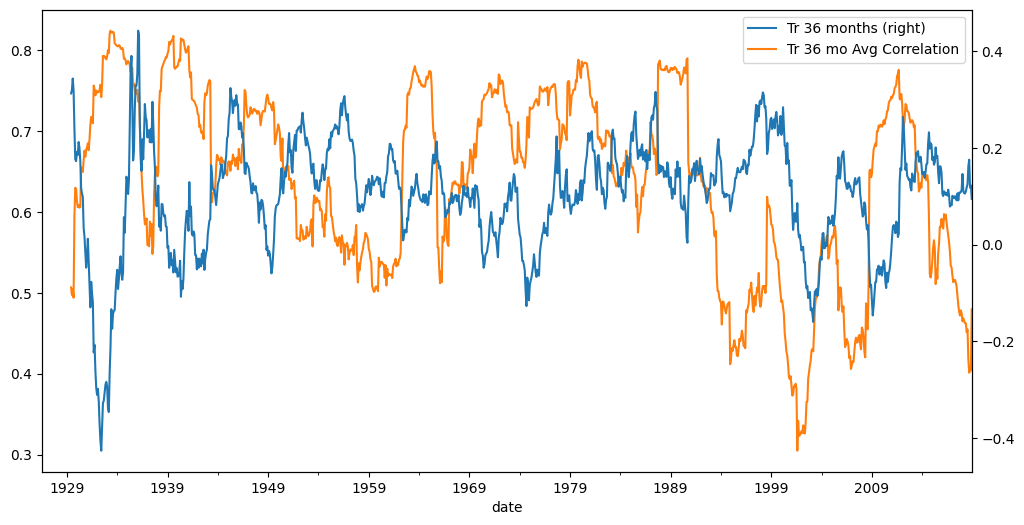

In [19]:
tmi_tr36rets.plot(secondary_y=True, legend = True, label = "Tr 36 months", figsize = (12, 6))
ind_tr36_corr.plot(legend=True, label="Tr 36 mo Avg Correlation")

In [20]:
tmi_tr36rets.corr(ind_tr36_corr)


np.float64(-0.28010065062884026)

Clearly, these two series are negatively correlated, which explains why diversification fails you when you need it the most. When markets fall, correlations rise, making diversification much less valuable.

Instead, We will look at how top use Insurance to protect the downside in the next section.